In [ ]:
print('(-|\\|-)')

(-|\|-)


In [1]:
!nvidia-smi #checking the gpu

Sat Jul 13 04:44:37 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


Install YOLOv8 (version 8.0.20 because new version is still under developement)

In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

Custom Training

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/YOLOv8 Assignment

/content/drive/.shortcut-targets-by-id/1Ld113I7_3380xn6idpb3i9B-a6qdhwSB/YOLOv8 Assignment


In [ ]:
pip install --upgrade ultralytics


In [ ]:
%cd /content/drive/MyDrive/YOLOv8 Assignment

/content/drive/.shortcut-targets-by-id/1Ld113I7_3380xn6idpb3i9B-a6qdhwSB/YOLOv8 Assignment


In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=15 imgsz=640 plots=True

WARNING ⚠️ Ultralytics settings reset to default values. This may be due to a possible problem with your settings or a recent ultralytics package update. 
View settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.yaml'
Update settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics YOLOv8.2.54 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=15, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train8, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, va

In [ ]:
%cd /content/drive/MyDrive/YOLOv8 Assignment/runs/detect/train8/
!ls

/content/drive/.shortcut-targets-by-id/1Ld113I7_3380xn6idpb3i9B-a6qdhwSB/YOLOv8 Assignment/runs/detect/train8
args.yaml					    R_curve.png		val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		val_batch0_pred.jpg
confusion_matrix.png				    results.png		val_batch1_labels.jpg
events.out.tfevents.1720766364.bc989400bda6.1928.0  train_batch0.jpg	val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2.jpg	val_batch2_pred.jpg
labels.jpg					    train_batch475.jpg	weights
P_curve.png					    train_batch476.jpg
PR_curve.png					    train_batch477.jpg


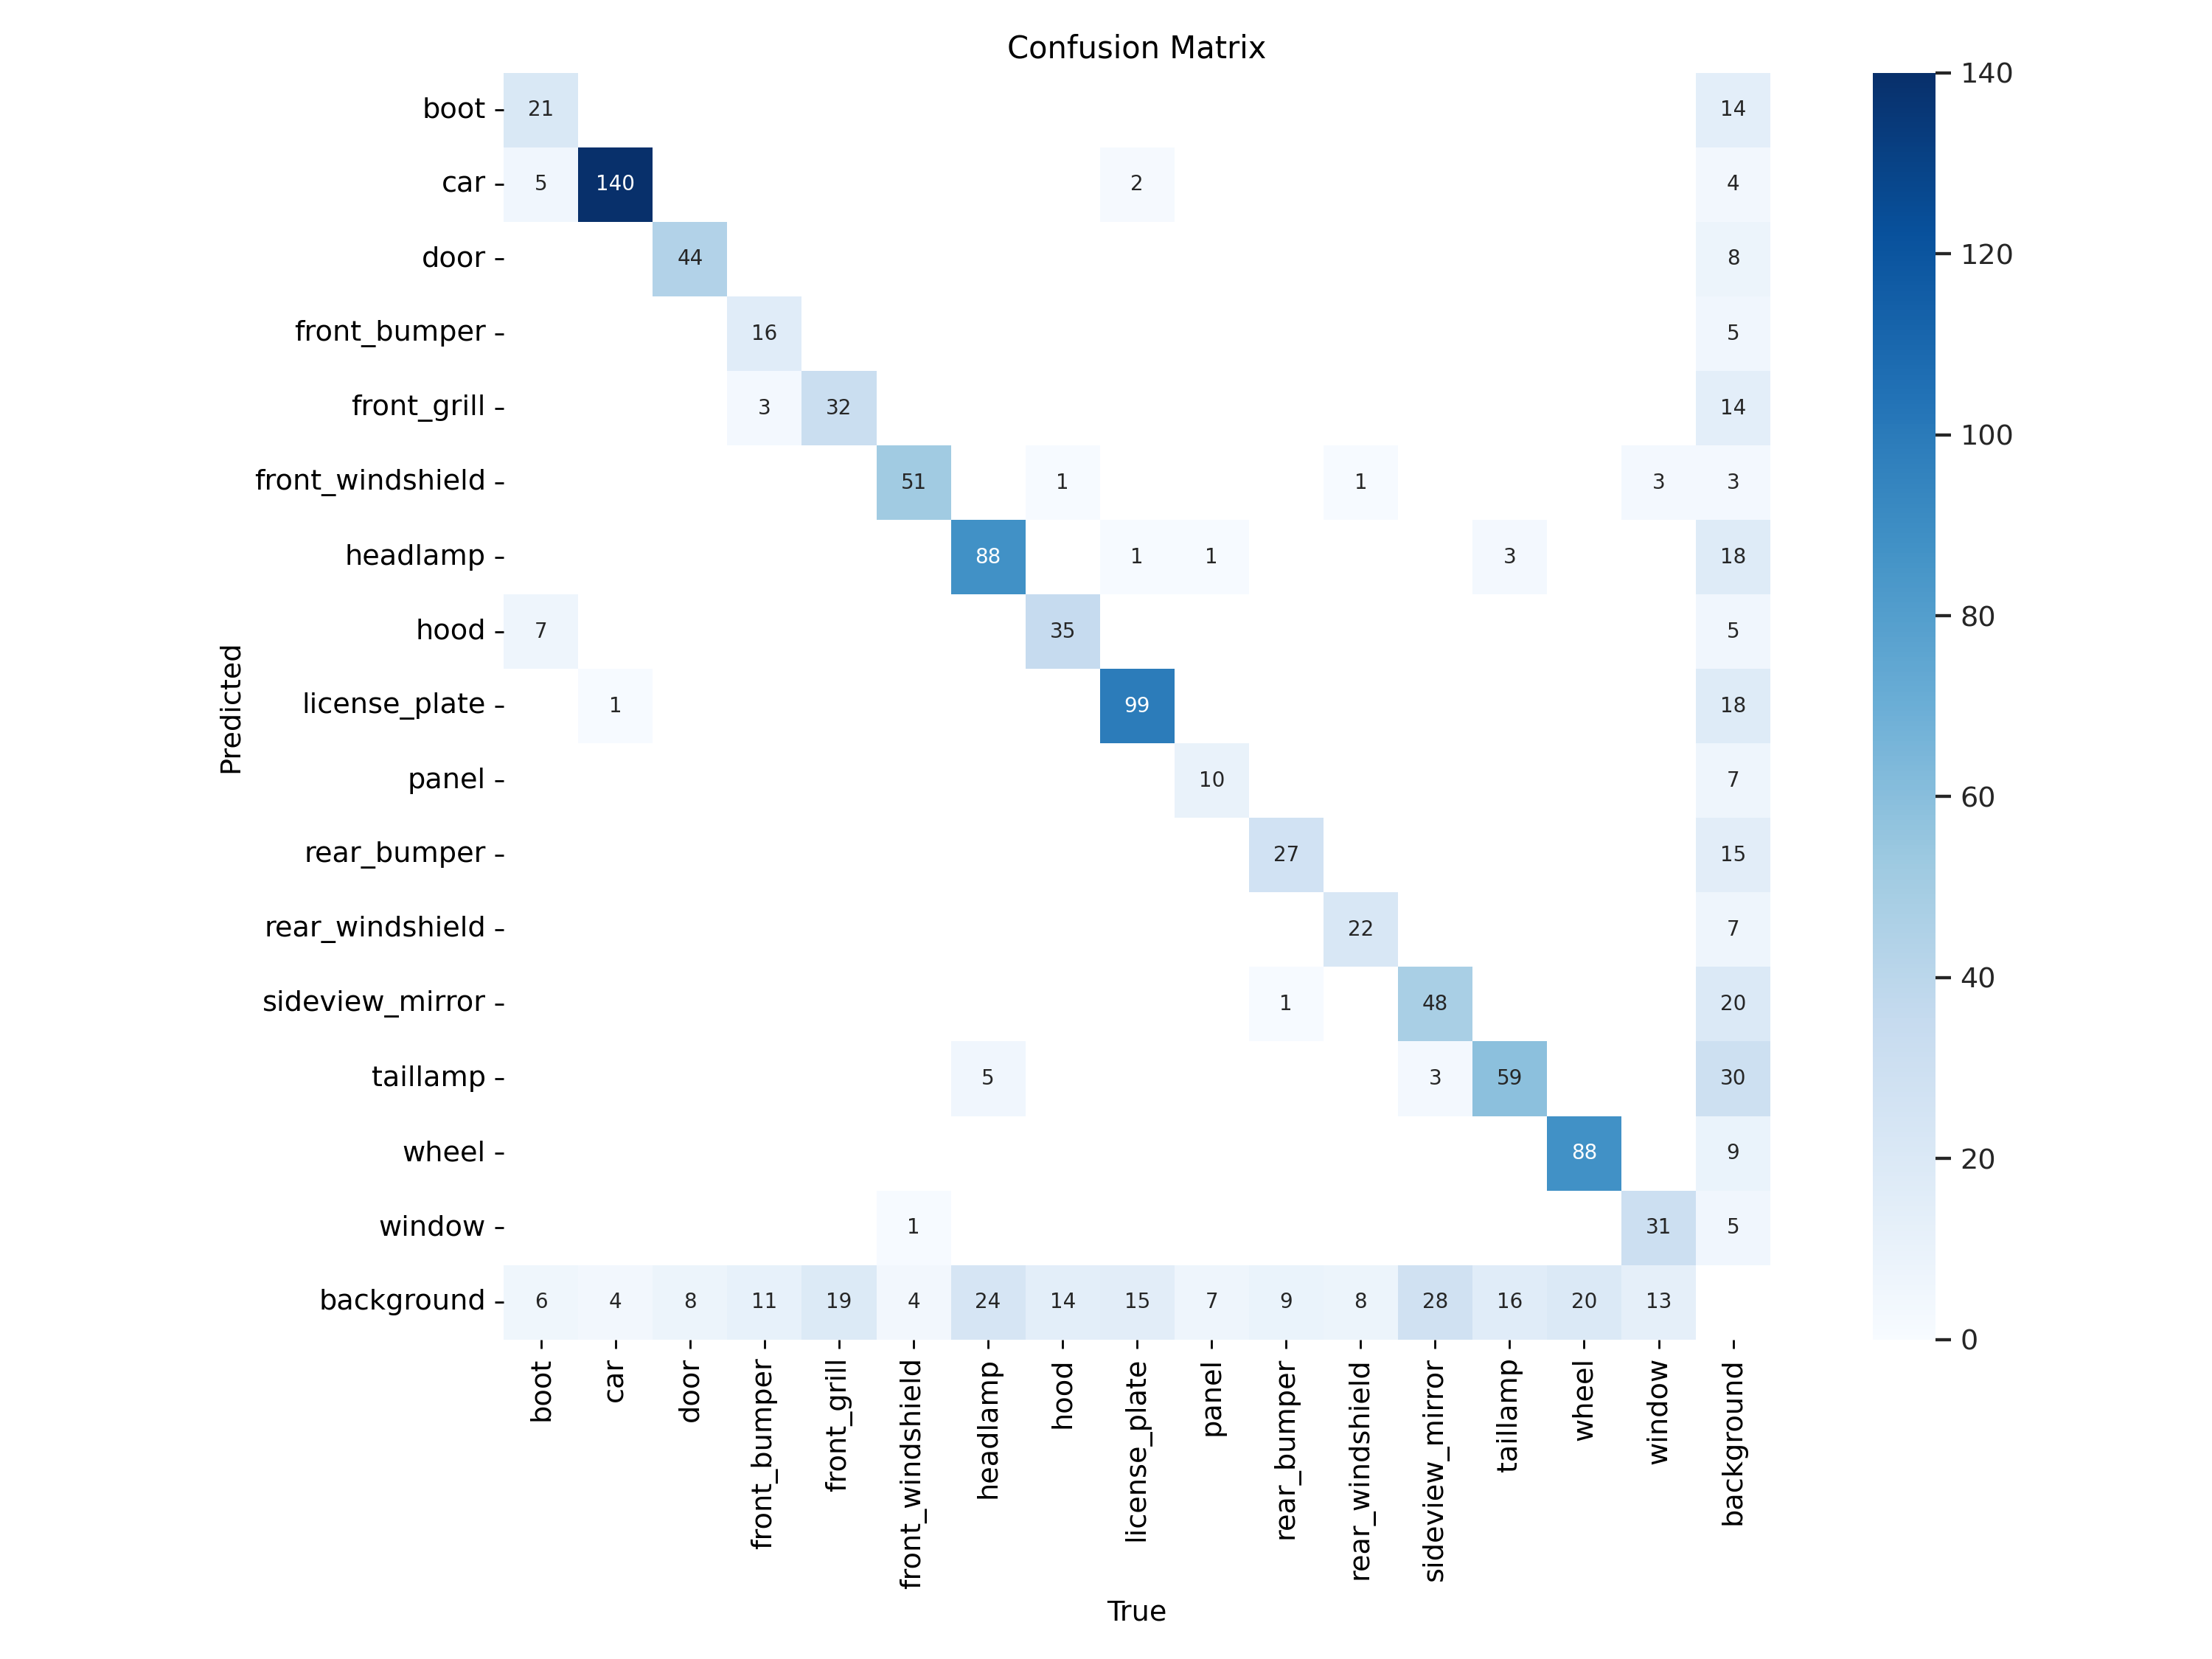

In [ ]:
from IPython.display import Image
Image(filename='confusion_matrix.png', width=600)

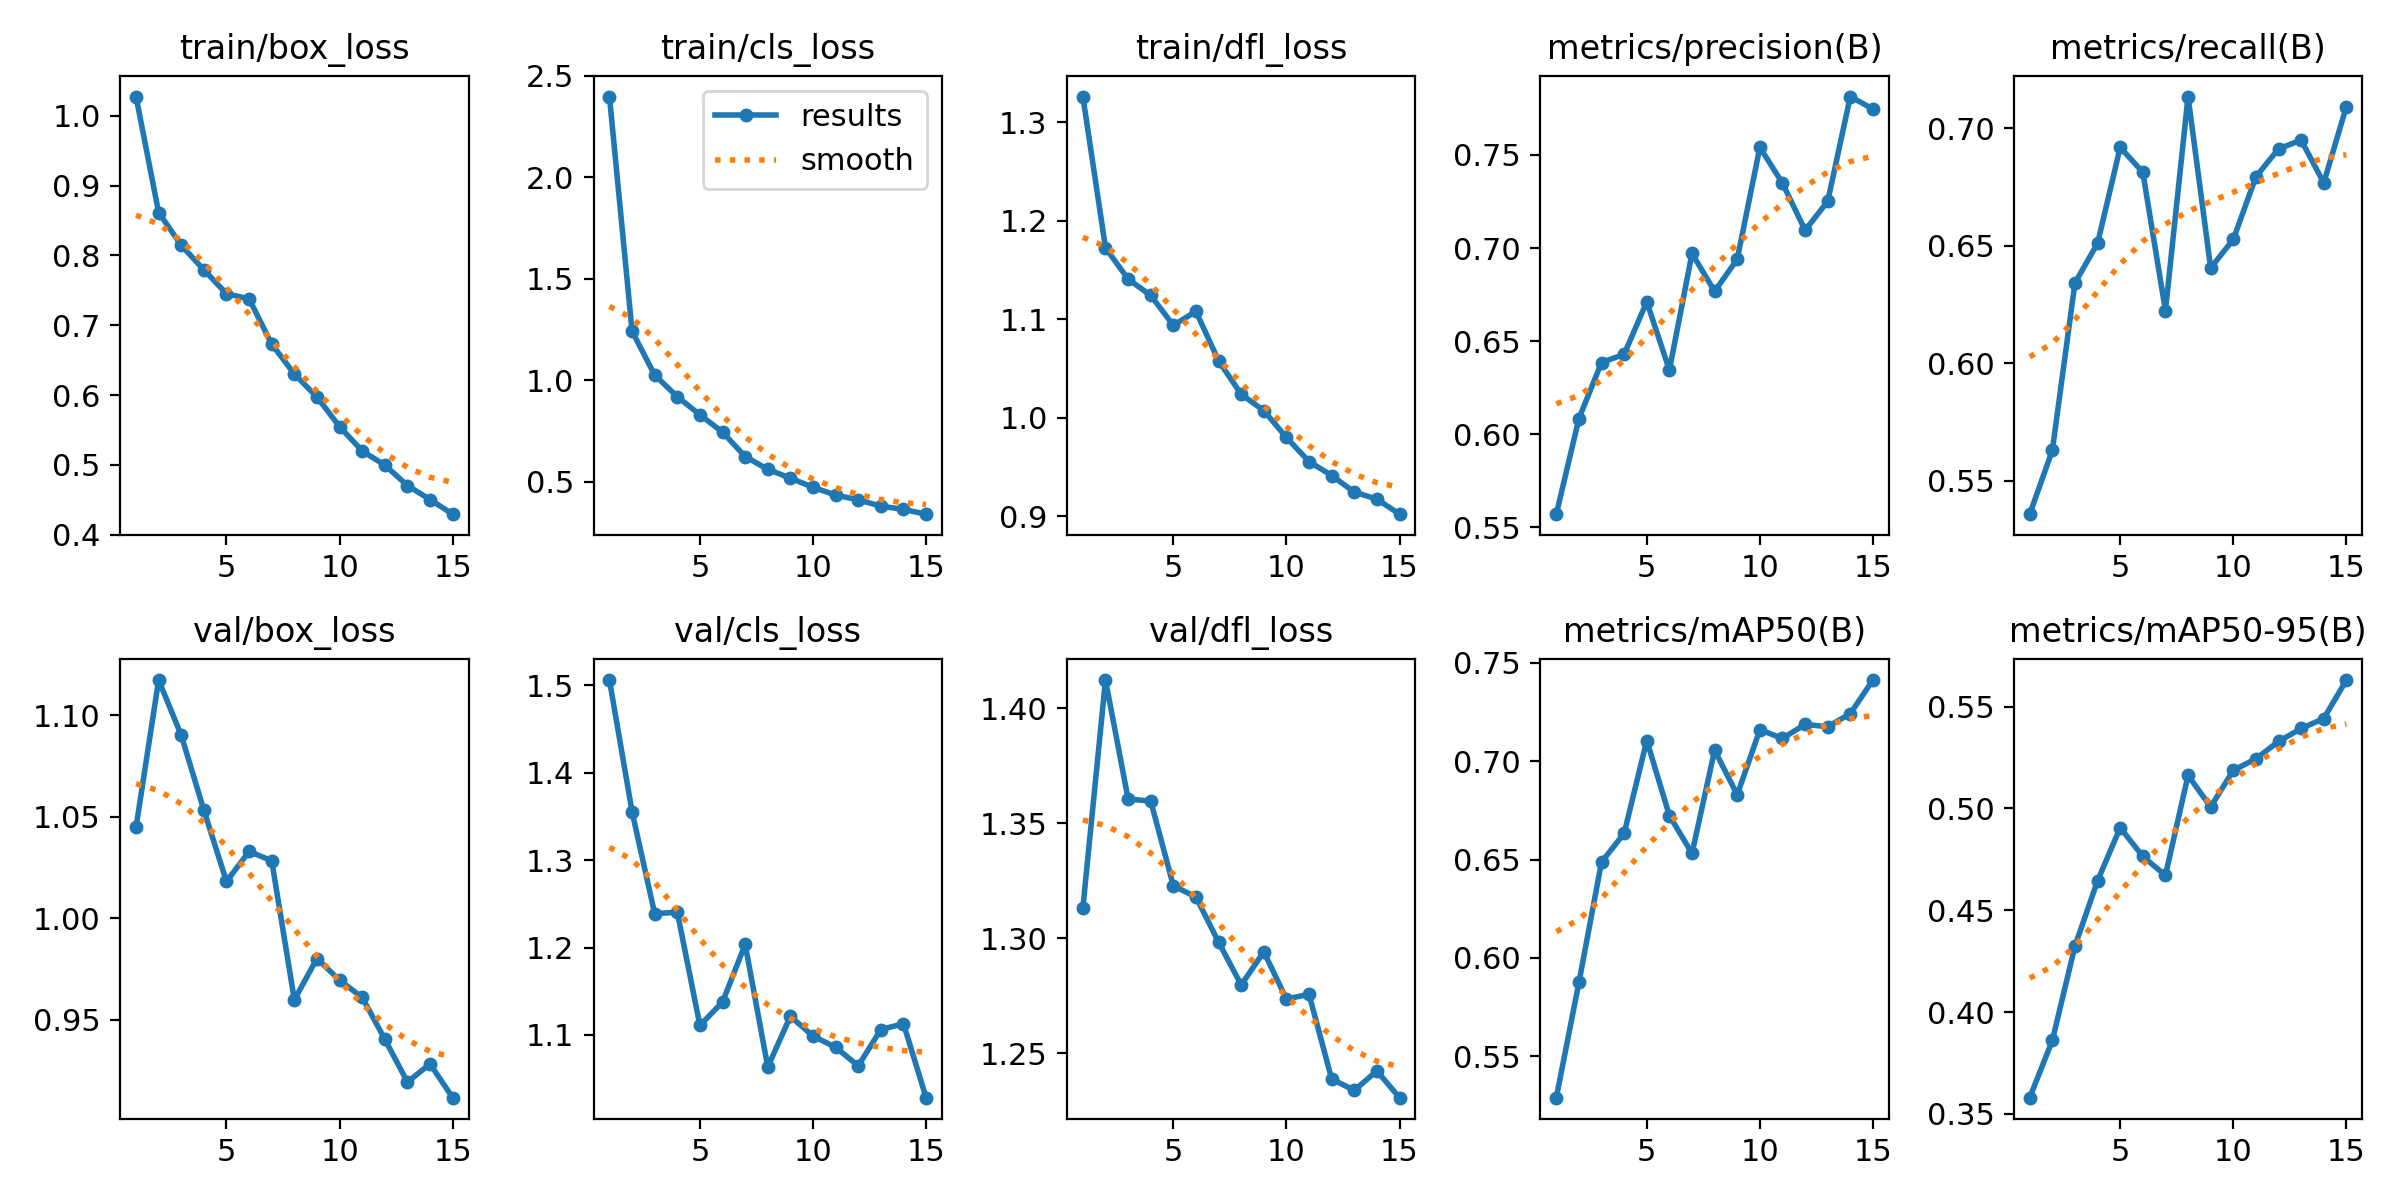

In [ ]:
Image(filename='results.png', width=600)

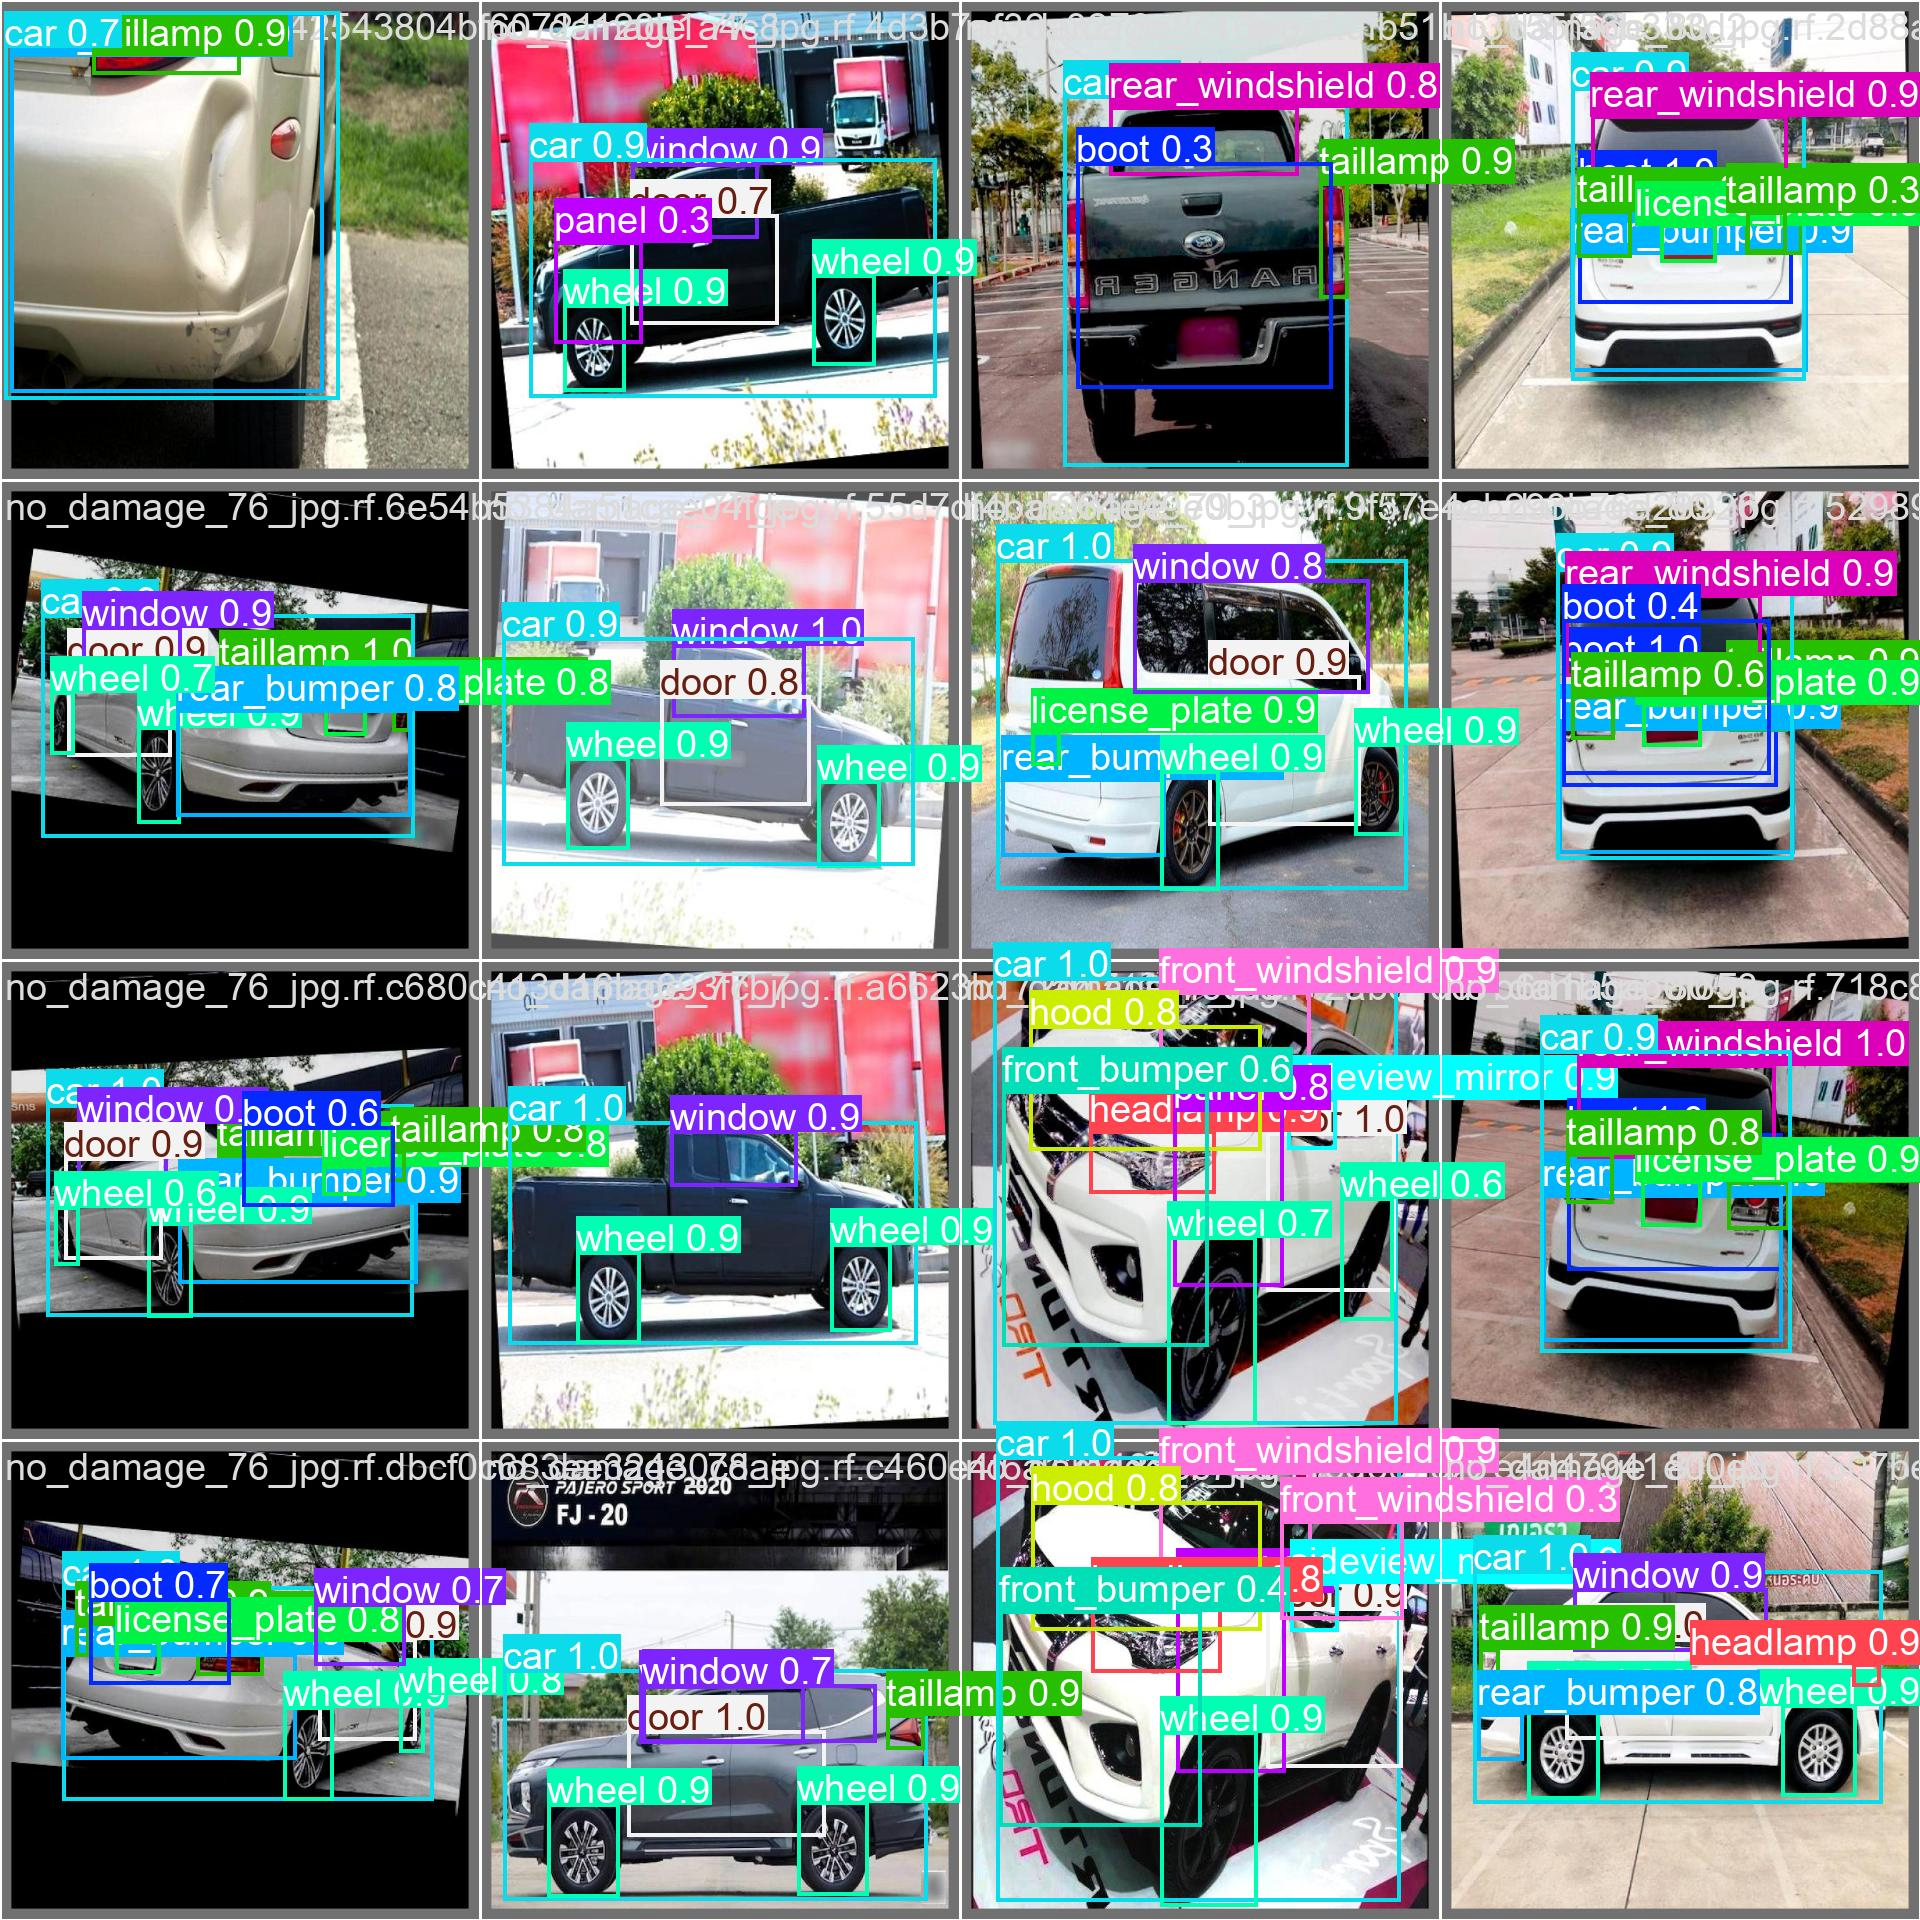

In [ ]:
Image(filename='val_batch0_pred.jpg', width=600)

In [ ]:
%cd /content/drive/MyDrive/YOLOv8 Assignment
!yolo task=detect mode=val model=runs/detect/train8/weights/best.pt data=data.yaml

/content/drive/.shortcut-targets-by-id/1Ld113I7_3380xn6idpb3i9B-a6qdhwSB/YOLOv8 Assignment
Ultralytics YOLOv8.2.54 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11131776 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/drive/.shortcut-targets-by-id/1Ld113I7_3380xn6idpb3i9B-a6qdhwSB/YOLOv8 Assignment/dataset/valid/labels.cache... 160 images, 1 backgrounds, 0 corrupt: 100% 160/160 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 10/10 [00:10<00:00,  1.09s/it]
                   all        160       1055      0.774       0.71      0.741      0.563
                  boot         35         39      0.675      0.585      0.568      0.479
                   car        142        145      0.933      0.959      0.946      0.865
                  door         50         52      0.861      0.832      0.886      0.635
          front_bumper         30         30      0.761 

In [ ]:
%cd /content/drive/MyDrive/YOLOv8 Assignment
!yolo task=detect mode=predict model=runs/detect/train8/weights/best.pt conf=0.25 source=dataset/test/images

/content/drive/.shortcut-targets-by-id/1Ld113I7_3380xn6idpb3i9B-a6qdhwSB/YOLOv8 Assignment
Ultralytics YOLOv8.2.54 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11131776 parameters, 0 gradients, 28.5 GFLOPs

image 1/22 /content/drive/.shortcut-targets-by-id/1Ld113I7_3380xn6idpb3i9B-a6qdhwSB/YOLOv8 Assignment/dataset/test/images/Cars212_png.rf.c31b66dbfb5e4d5bc2e10f4b331f03aa.jpg: 640x640 1 front_grill, 1 license_plate, 16.5ms
image 2/22 /content/drive/.shortcut-targets-by-id/1Ld113I7_3380xn6idpb3i9B-a6qdhwSB/YOLOv8 Assignment/dataset/test/images/Cars260_png.rf.358fc27422dbe6062fced88e7e5b59cc.jpg: 640x640 2 cars, 2 license_plates, 16.5ms
image 3/22 /content/drive/.shortcut-targets-by-id/1Ld113I7_3380xn6idpb3i9B-a6qdhwSB/YOLOv8 Assignment/dataset/test/images/Cars295_png.rf.5452c67121f3be7c3e37148a9cc4936d.jpg: 640x640 2 cars, 2 license_plates, 16.4ms
image 4/22 /content/drive/.shortcut-targets-by-id/1Ld113I7_3380xn6idpb3i9B-a6qdhwSB/YO